============================== SCENARIO 1: 2-YEAR FIXED TERMS ==============================

==================== SCENARIO: CASE STUDY: 2-YEAR FIXED TERMS ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £550,000
  Holding Period:         15 years
  Fixed Term Length:      2 years
  Initial Mortgage Rate:  4.85%
  Deposit Percentage:     20%
  Initial Service Charge: £3,500 p.a.
  Remortgage Fee:         £999

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      3.5% / 2.5%
  Remortgage Rate:       5.2% / 2.0%

--- Running 10,000 Simulations ---
Duration: 3.40 seconds

--- Processing Results ---

--- Analysis for: CASE STUDY: 2-YEAR FIXED TERMS ---

--- Monte Carlo Results Summary ---

--- Cash Scenario ---
  Net Gain:
mean     £142,171
std      £158,266
min     £-292,585
5%       £-93,313
50%      £128,294
95%      £423,294
max

/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£142,171' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.33%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_roi['mean'] = f"{stats_roi['mean']:.2f}%"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£964,139' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users

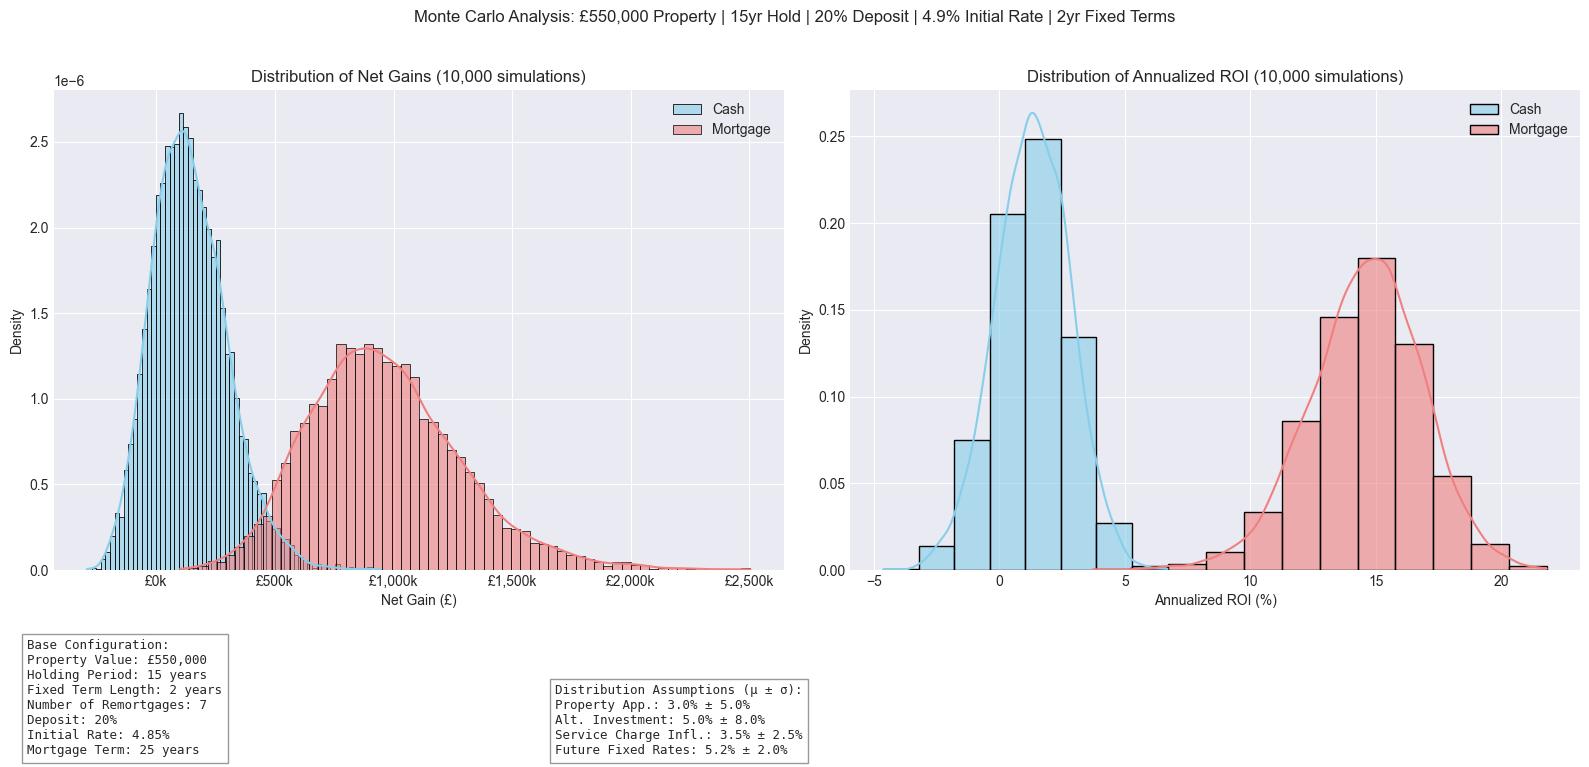

==================== END SCENARIO: CASE STUDY: 2-YEAR FIXED TERMS ====================


============================== SCENARIO 2: 5-YEAR FIXED TERMS ==============================

==================== SCENARIO: CASE STUDY: 5-YEAR FIXED TERMS ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £550,000
  Holding Period:         15 years
  Fixed Term Length:      5 years
  Initial Mortgage Rate:  4.45%
  Deposit Percentage:     20%
  Initial Service Charge: £3,500 p.a.
  Remortgage Fee:         £999

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      3.5% / 2.5%
  Remortgage Rate:       4.9% / 1.5%

--- Running 10,000 Simulations ---
Duration: 2.26 seconds

--- Processing Results ---

--- Analysis for: CASE STUDY: 5-YEAR FIXED TERMS ---

--- Monte Carlo Results Summary ---

--- Cash Scenario ---
  Net Gain:
mean     £142,107
std 

/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£142,107' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.33%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_roi['mean'] = f"{stats_roi['mean']:.2f}%"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£995,522' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users

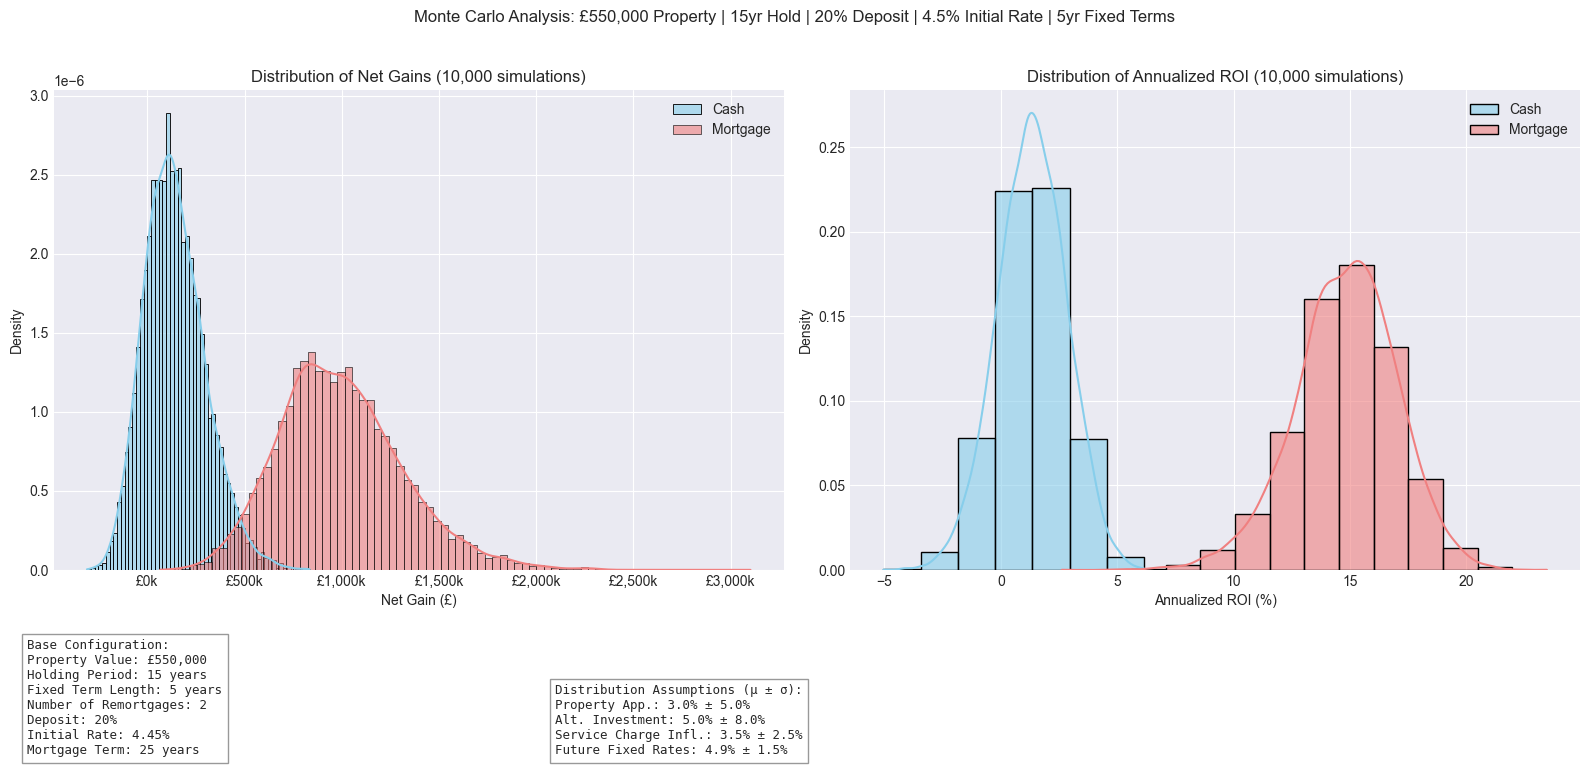

==================== END SCENARIO: CASE STUDY: 5-YEAR FIXED TERMS ====================


============================== SCENARIO COMPARISON ==============================

=== Scenario Comparison ===

Scenario Comparison Summary:
              Mortgage Net Gain (Mean)  Mortgage Net Gain (95% CI)  \
Scenario                                                             
2-Year Fixed                964,139.25                    6,321.45   
5-Year Fixed                995,521.51                    6,260.01   

              Cash Net Gain (Mean)  Cash Net Gain (95% CI)  \
Scenario                                                     
2-Year Fixed            142,170.70                3,102.01   
5-Year Fixed            142,107.30                3,084.79   

              Mortgage ROI (Mean)  Mortgage ROI (95% CI)  Cash ROI (Mean)  \
Scenario                                                                    
2-Year Fixed                14.60                   0.04             1.33   
5-Year Fi

/Users/Joseph/repos/mortgage_stuff/scenario_analysis.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Adjust rect to leave space for suptitle and legends


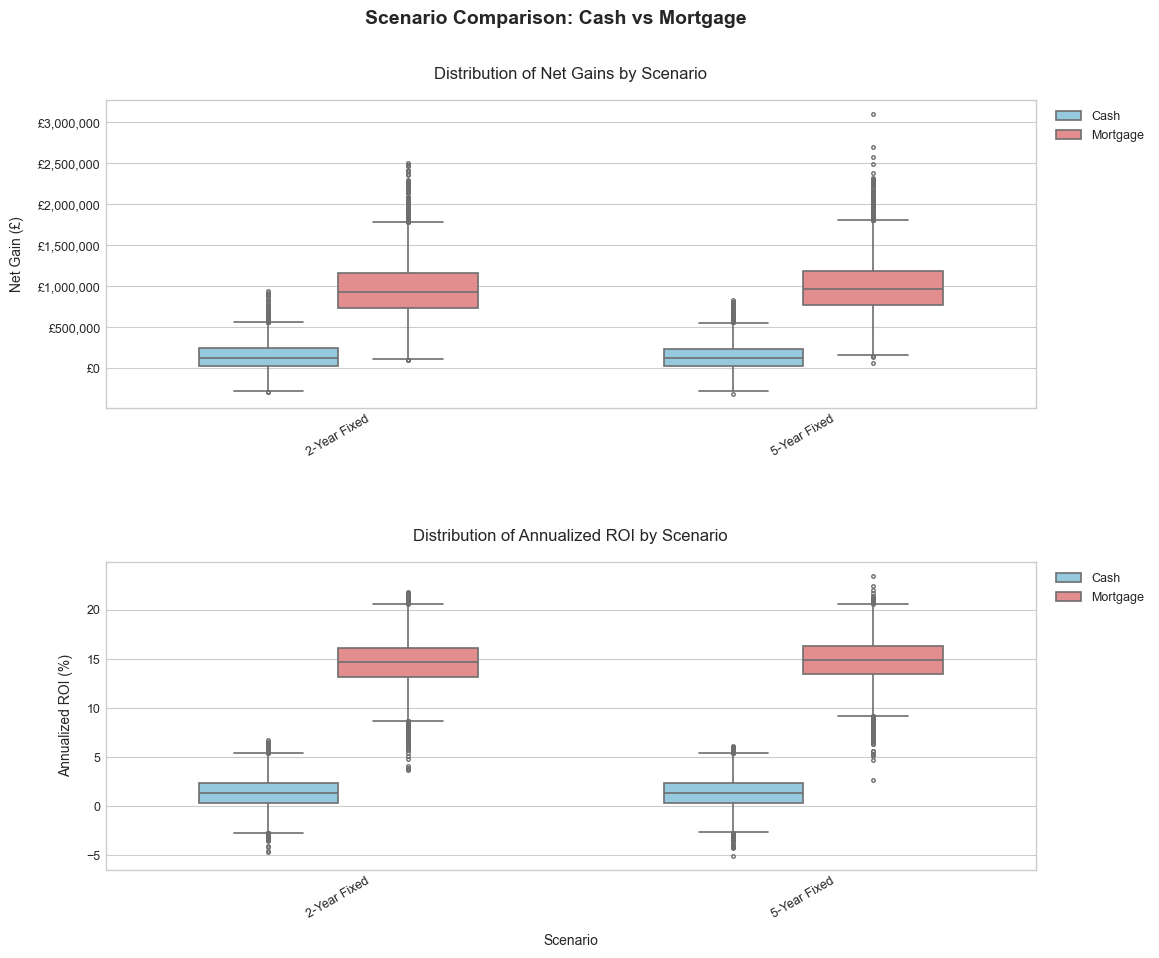

In [1]:
# --- Imports and Setup ---
%load_ext autoreload
%autoreload 2

from scenario_analysis import run_and_analyze_scenario, compare_scenarios
import pandas as pd
import numpy as np

# --- General Simulation Settings ---
NUM_SIMULATIONS = 10000 # Number of Monte Carlo iterations (e.g., 10,000 for reasonable results)
SHOW_INDIVIDUAL_SCENARIO_PLOTS = True # Set to False to hide plots for each individual scenario run

# --- Common Base Configuration Parameters (can be overridden per scenario) ---
# These are values you might want to keep consistent across both scenarios,
# or they can be part of the specific overrides.
COMMON_PROPERTY_VALUE = 550000
COMMON_DEPOSIT_PERCENTAGE = 0.20
COMMON_HOLDING_PERIOD = 15 # Years

# --- Scenario 1: 2-Year Fixed Terms ---
print("="*30 + " SCENARIO 1: 2-YEAR FIXED TERMS " + "="*30)

config_overrides_2yr = {
    "property_value_initial": COMMON_PROPERTY_VALUE,
    "holding_period_years": COMMON_HOLDING_PERIOD,
    "deposit_percentage": COMMON_DEPOSIT_PERCENTAGE,
    "fixed_term_length_years": 2,
    "initial_mortgage_interest_rate_annual": 0.0485,  # Example: 4.85% for a 2-year fix
    "mortgage_arrangement_fee": 1200,                # Example fee for a 2-year product
    "remortgage_fee": 999,                           # Fee per remortgage
    "service_charge_annual_initial": 3500,
    # Add any other specific overrides for the 2-year scenario
}

dist_assumptions_2yr = {
    "prop_app_mean": 0.03, "prop_app_std_dev": 0.05,       # Property appreciation
    "alt_inv_mean": 0.05, "alt_inv_std_dev": 0.08,        # Alternative investment returns
    "sc_inf_mean": 0.035, "sc_inf_std_dev": 0.025,      # Service charge inflation
    "remort_rate_mean": 0.052,  # Expected mean for future 2-year rates (e.g., 5.2%)
    "remort_rate_std_dev": 0.020 # Expected volatility for future 2-year rates (e.g., 2.0%)
}

df_results_2yr = run_and_analyze_scenario(
    scenario_name="CASE STUDY: 2-YEAR FIXED TERMS",
    config_overrides=config_overrides_2yr,
    dist_assumptions=dist_assumptions_2yr,
    num_simulations=NUM_SIMULATIONS,
    show_plots=SHOW_INDIVIDUAL_SCENARIO_PLOTS
)
print("="*80 + "\n")


# --- Scenario 2: 5-Year Fixed Terms ---
print("="*30 + " SCENARIO 2: 5-YEAR FIXED TERMS " + "="*30)

config_overrides_5yr = {
    "property_value_initial": COMMON_PROPERTY_VALUE,
    "holding_period_years": COMMON_HOLDING_PERIOD,
    "deposit_percentage": COMMON_DEPOSIT_PERCENTAGE,
    "fixed_term_length_years": 5,
    "initial_mortgage_interest_rate_annual": 0.0445,  # Example: 4.45% for a 5-year fix
    "mortgage_arrangement_fee": 1500,                # Example fee for a 5-year product
    "remortgage_fee": 999,                           # Fee per remortgage
    "service_charge_annual_initial": 3500,
    # Add any other specific overrides for the 5-year scenario
}

dist_assumptions_5yr = {
    "prop_app_mean": 0.03, "prop_app_std_dev": 0.05,       # Property appreciation
    "alt_inv_mean": 0.05, "alt_inv_std_dev": 0.08,        # Alternative investment returns
    "sc_inf_mean": 0.035, "sc_inf_std_dev": 0.025,      # Service charge inflation
    "remort_rate_mean": 0.049,  # Expected mean for future 5-year rates (e.g., 4.9%)
    "remort_rate_std_dev": 0.015 # Expected volatility for future 5-year rates (e.g., 1.5%)
}

df_results_5yr = run_and_analyze_scenario(
    scenario_name="CASE STUDY: 5-YEAR FIXED TERMS",
    config_overrides=config_overrides_5yr,
    dist_assumptions=dist_assumptions_5yr,
    num_simulations=NUM_SIMULATIONS,
    show_plots=SHOW_INDIVIDUAL_SCENARIO_PLOTS
)
print("="*80 + "\n")


# --- Compare Scenarios ---
print("="*30 + " SCENARIO COMPARISON " + "="*30)

scenarios_to_compare = {}
if df_results_2yr is not None and not df_results_2yr.empty:
    scenarios_to_compare["2-Year Fixed"] = df_results_2yr
if df_results_5yr is not None and not df_results_5yr.empty:
    scenarios_to_compare["5-Year Fixed"] = df_results_5yr

compare_scenarios(scenarios_to_compare, show_plots=True)